# Aceleração em Data Science - Semana 6

_"Os fatos são teimosos, mas as estatísticas são mais maleáveis." - Mark Twain_

### Pensamento estatístico em Python - Seleção de variáveis/Redução de dimensionalidade

#### Dados: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Leitura do Data Frame

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Colunas do Data Frame

df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Dimensão do Data Frame

df.shape

(1460, 81)

In [5]:
# Types

df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# Sumarização

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Analysis

### Seleção por completude

In [8]:
# Criando Data Frame para auxiliar na análise da consistencia das variáveis

cons = pd.DataFrame({'colunas': df.columns,
                    'tipo': df.dtypes,
                    'missing': df.isna().sum(),
                    'size': df.shape[0],
                    'únicos': df.nunique()})

cons['percentual'] = round(cons['missing']/cons['size'], 2)

In [9]:
cons.head()

,colunas,tipo,missing,size,únicos,percentual
Id,Id,int64,0,1460,1460,0.00
MSSubClass,MSSubClass,int64,0,1460,15,0.00
MSZoning,MSZoning,object,0,1460,5,0.00
LotFrontage,LotFrontage,float64,259,1460,110,0.18
LotArea,LotArea,int64,0,1460,1073,0.00


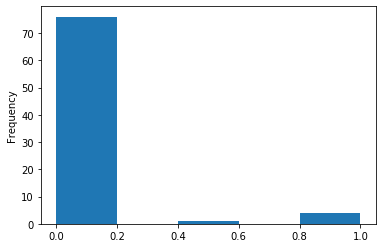

In [10]:
# percentual dos missings

cons.percentual.plot.hist(bins = 5)

### Removendo colunas com dados missing

In [11]:
print('Contagem de colunas com até 20% de dados faltantes: ', cons[cons.percentual < 0.2].shape[0])
print('Contagem de colunas com mais de 40% de dados faltantes: ', cons[cons.percentual > 0.4].shape[0])
print('Contagem de colunas com 0% de dados faltantes: ', cons[cons.percentual == 0].shape[0])

Contagem de colunas com até 20% de dados faltantes:  76
Contagem de colunas com mais de 40% de dados faltantes:  5
Contagem de colunas com 0% de dados faltantes:  63


In [12]:
cons[cons.percentual == 0]['tipo'].value_counts()

int64     35
object    28
Name: tipo, dtype: int64

In [13]:
cons['completa'] = ['completa' if x == 0 else 'faltante' for x in cons['percentual']]

In [14]:
mantem = list(cons[cons['completa'] == 'completa']['colunas'])
df = df[mantem]

In [15]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
colunas_numericas = list(cons[((cons['tipo'] != 'object') &
                              (cons['completa'] == 'completa'))]['colunas'])

In [17]:
colunas_numericas

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### Exploração

Id


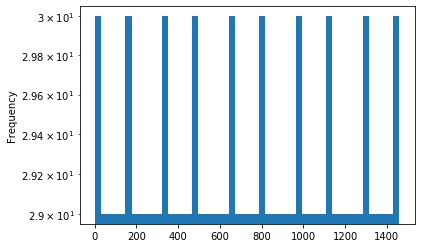

MSSubClass


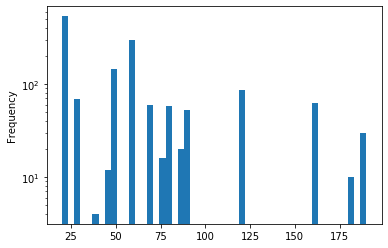

LotArea


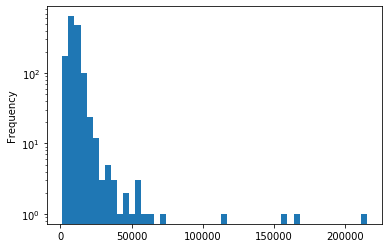

OverallQual


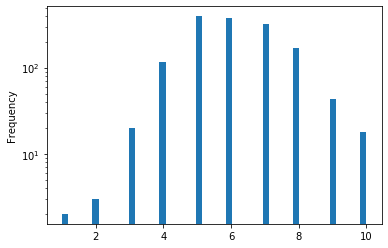

OverallCond


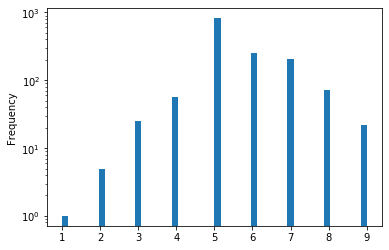

YearBuilt


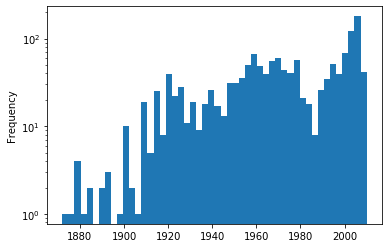

YearRemodAdd


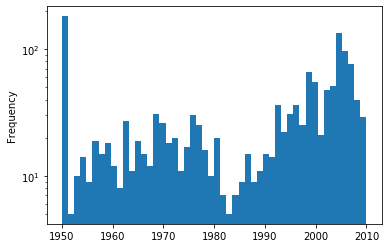

BsmtFinSF1


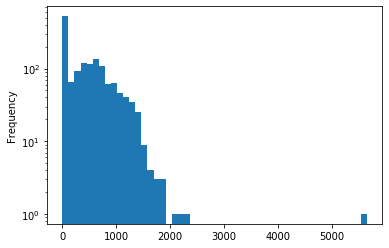

BsmtFinSF2


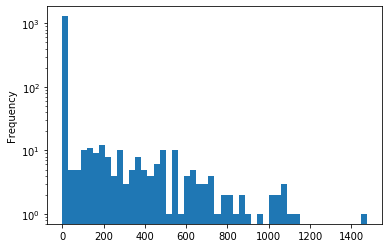

BsmtUnfSF


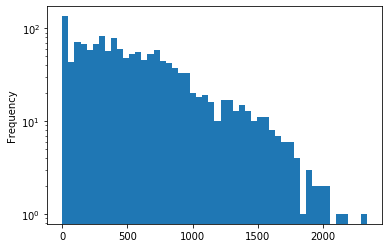

TotalBsmtSF


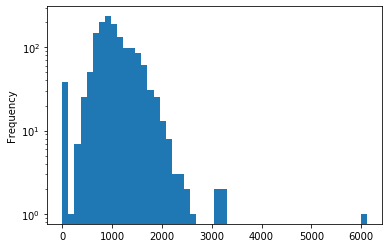

1stFlrSF


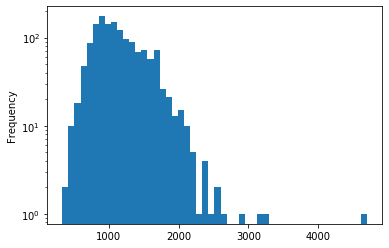

2ndFlrSF


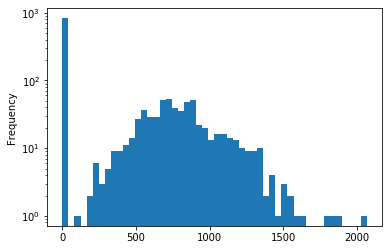

LowQualFinSF


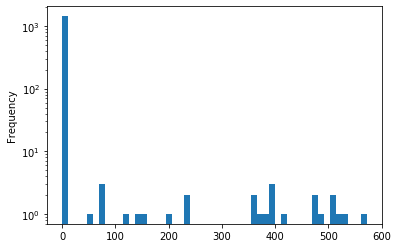

GrLivArea


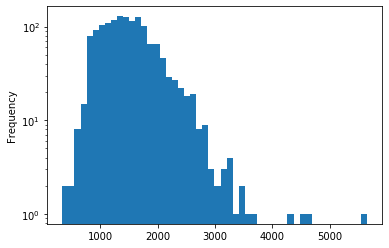

BsmtFullBath


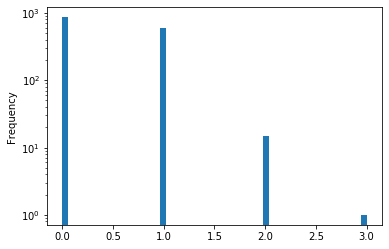

BsmtHalfBath


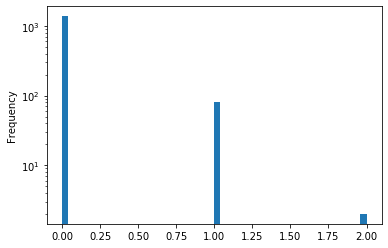

FullBath


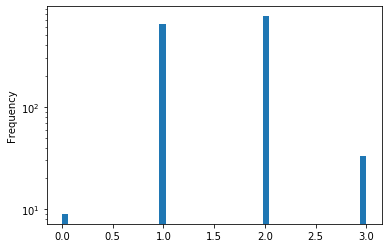

HalfBath


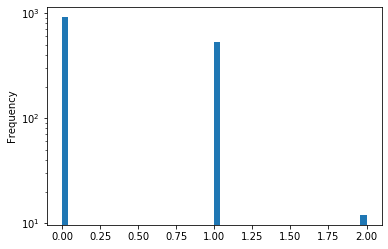

BedroomAbvGr


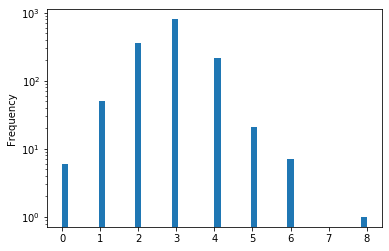

KitchenAbvGr


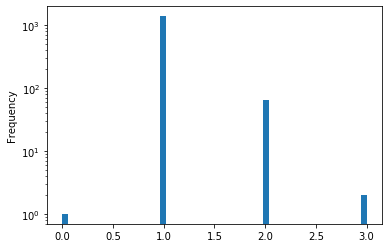

TotRmsAbvGrd


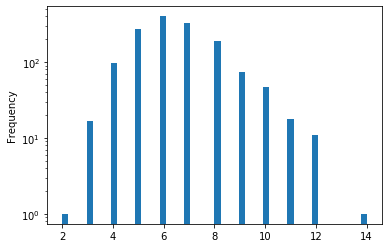

Fireplaces


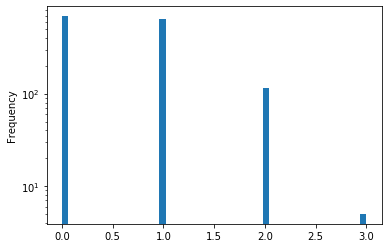

GarageCars


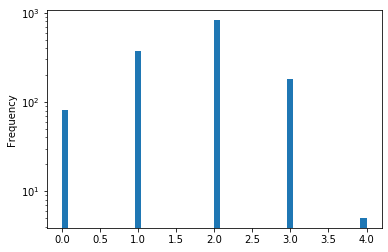

GarageArea


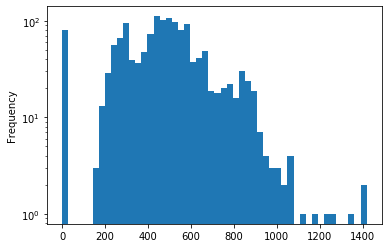

WoodDeckSF


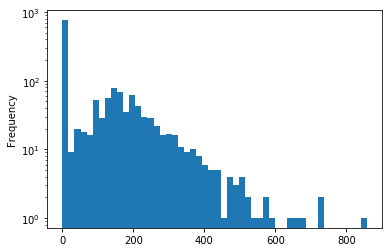

OpenPorchSF


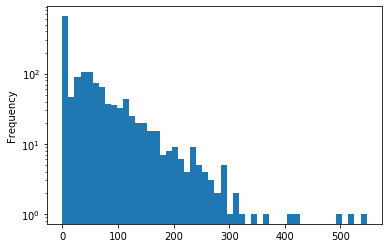

EnclosedPorch


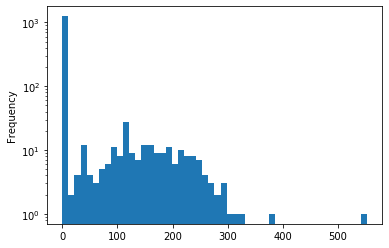

3SsnPorch


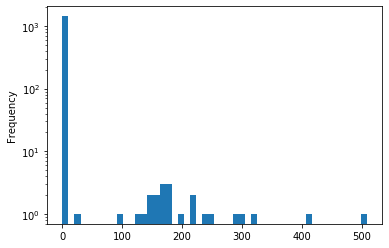

ScreenPorch


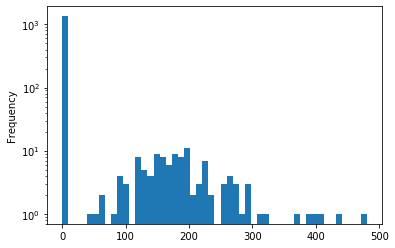

PoolArea


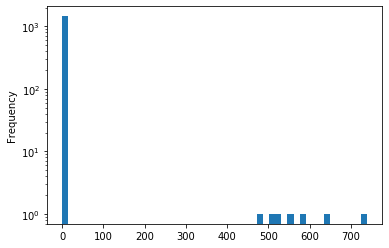

MiscVal


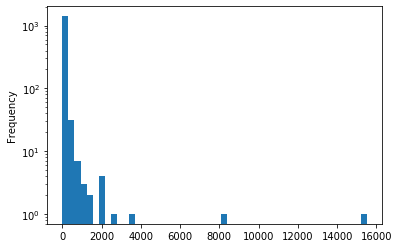

MoSold


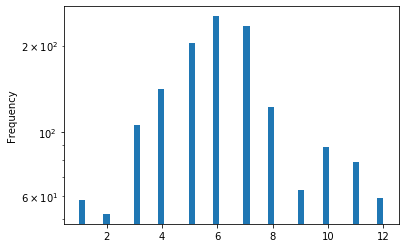

YrSold


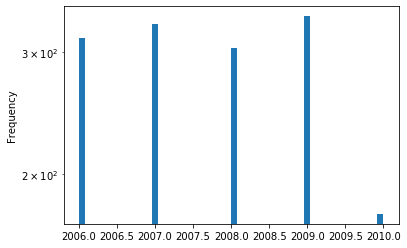

SalePrice


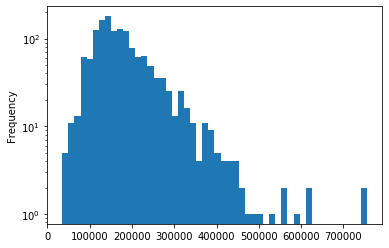

In [18]:
# Analise univariavel

for coluna in colunas_numericas:
    print(coluna)
    df[coluna].plot.hist(bins = 50, log = True)  # escala log para nos ajudar a ver a ordem de grandez
    plt.show()

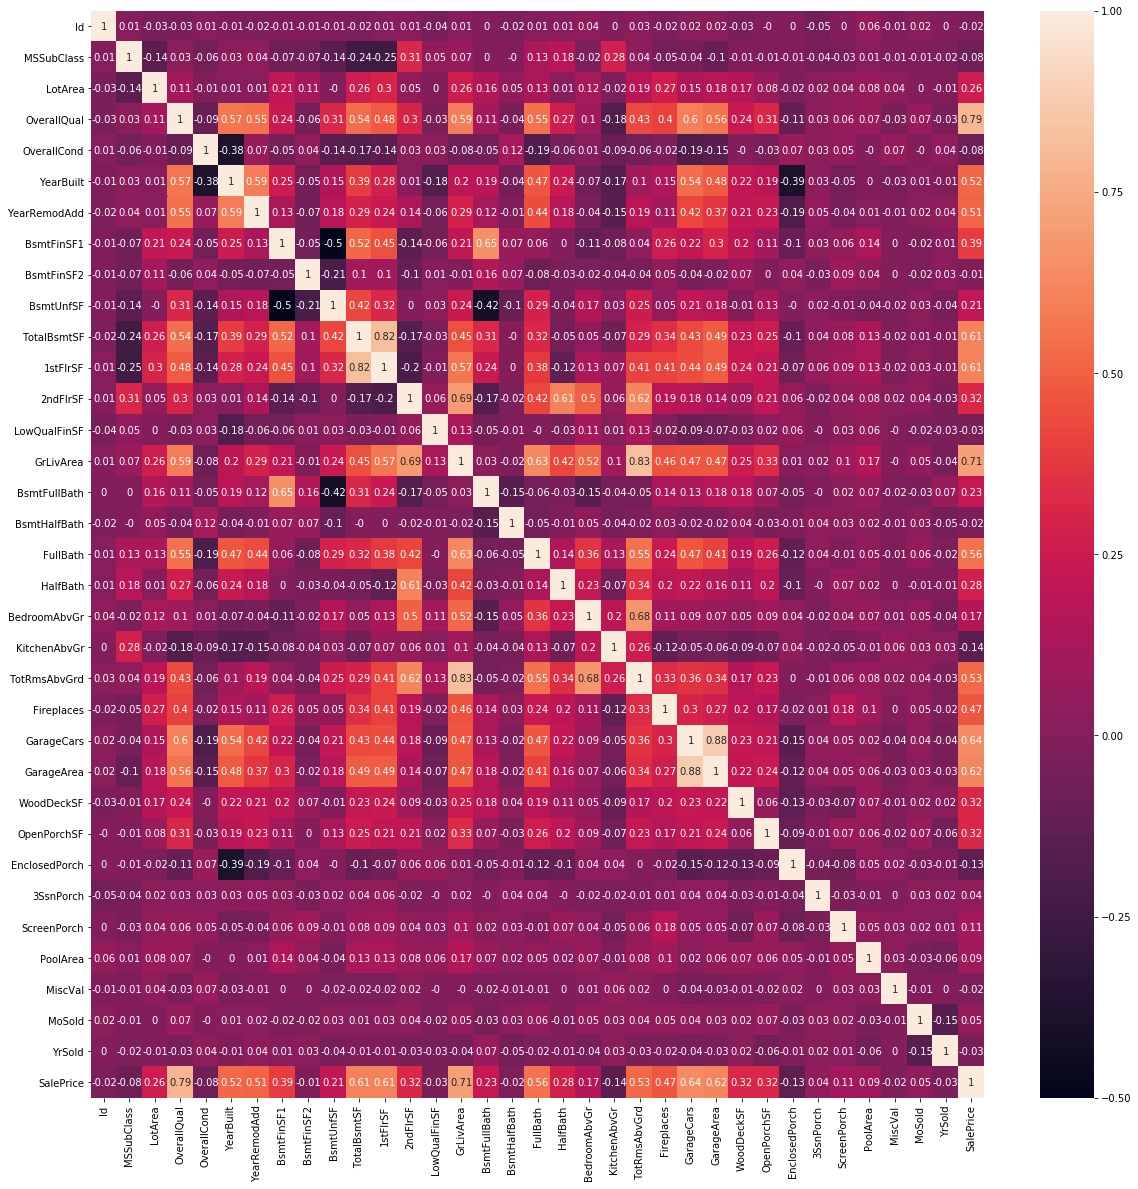

In [19]:
#Analisando a correlacao entre as variaveis númericas

plt.figure(figsize = (20, 20))
sns.heatmap(df[colunas_numericas].corr().round(2), annot= True)

In [20]:
correlacionadas = ['GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual']

### Analisando as features com yellowbrick

In [21]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Removendo a coluna ID

colunas_numericas.remove('Id')
df = df[colunas_numericas]

In [23]:
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [24]:
X_train = df.drop(columns = 'SalePrice')
y_train = df["SalePrice"]

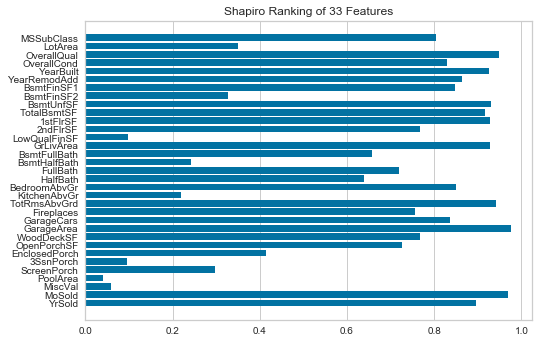

In [25]:
from yellowbrick.features import Rank1D

visualizer = Rank1D(algorithm = 'shapiro')

visualizer.fit(X_train, y_train)
visualizer.transform(X_train)
visualizer.show()

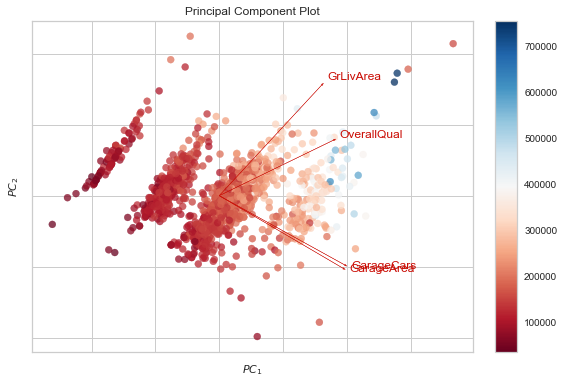

In [26]:
from yellowbrick.features import PCA

visualizer = PCA(scale=True, proj_features=True, projection=2)
visualizer.fit_transform(X_train[correlacionadas], y_train)
visualizer.show()

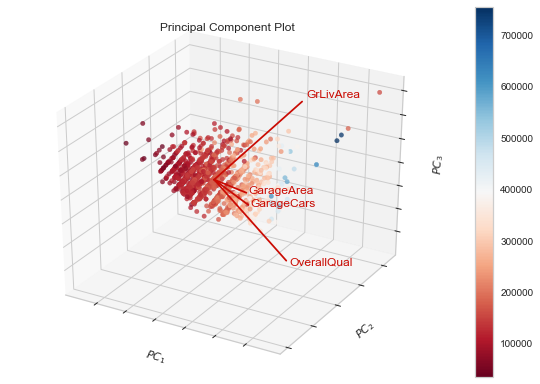

In [27]:
visualizer = PCA(scale=True, proj_features=True, projection=3)
visualizer.fit_transform(X_train[correlacionadas], y_train)
visualizer.show()

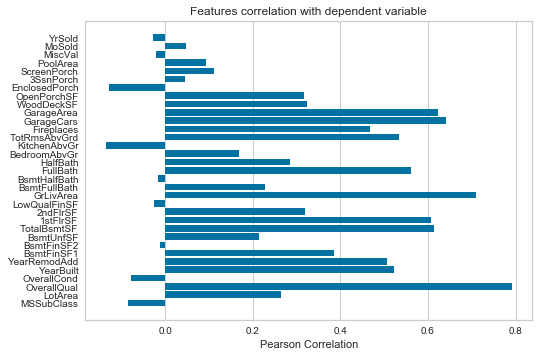

In [28]:
from yellowbrick.target import FeatureCorrelation

features = list(X_train.columns)

visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X_train, y_train)
visualizer.show()

### Treinando o modelo

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()

In [31]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
colunas_treinamento = X_train.columns

In [33]:
X_test = pd.read_csv('test.csv')
y_test = pd.read_csv('sample_submission.csv')

In [34]:
y_test = y_test['SalePrice']

In [35]:
X_test = X_test[colunas_treinamento].fillna(df[colunas_treinamento].mean())

In [36]:
y_pred = reg.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
erro_normal = mean_squared_error(y_pred = y_pred, y_true = y_test)
# não cuidamos em buscar um bom erro agora

### Aplicando o Feature Selection

In [39]:
from sklearn.feature_selection import RFE

In [40]:
rfe = RFE(reg)

In [41]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [42]:
pd.DataFrame({'coluna': X_train.columns,
             'bool': rfe.get_support(),
             'coeficientes': pd.Series(reg.coef_)})

,coluna,bool,coeficientes
0,MSSubClass,True,-162.672852
1,LotArea,False,0.396228
2,OverallQual,True,17905.067194
3,OverallCond,True,4418.794796
4,YearBuilt,True,346.653503
5,YearRemodAdd,True,137.073924
6,BsmtFinSF1,False,11.833598
7,BsmtFinSF2,False,-2.728260
8,BsmtUnfSF,False,0.787735
9,TotalBsmtSF,False,9.893072


In [43]:
X_train_importante = rfe.transform(X_train)
X_test_importante = rfe.transform(X_test)

In [44]:
reg.fit(X_train_importante, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred_imp = reg.predict(X_test_importante)

In [46]:
erro_imp = mean_squared_error(y_pred = y_pred_imp, y_true = y_test)

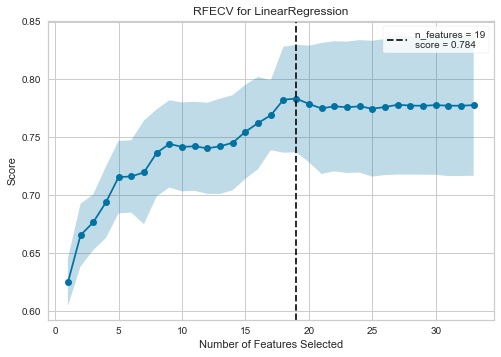

In [47]:
from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(reg)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

### Aplicando PCA

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(0.95)
# mantem 0.95 de variancia aplicada

In [50]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
pca.explained_variance_ratio_

array([0.98511677])

In [52]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [53]:
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_pred_pca = reg.predict(X_test_pca)

In [55]:
erro_pca = mean_squared_error(y_pred=y_pred_pca, y_true=y_test)

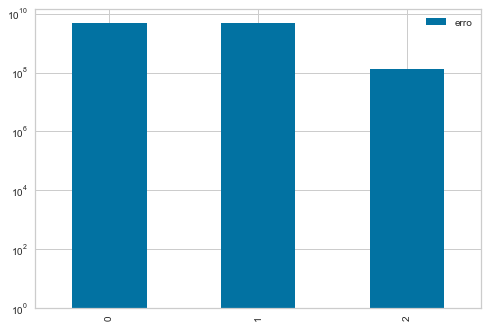

In [56]:
pd.DataFrame({'erro' : [erro_normal, erro_imp, erro_pca]}).plot(kind = 'bar', log = True)